# Preprocessing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

## 1. Dataset Prepation

import data set fom Kagglehub [Phishing Email Dataset](https://www.kaggle.com/datasets/naserabdullahalam/phishing-email-dataset/data)

In [2]:
import kagglehub
path = kagglehub.dataset_download("naserabdullahalam/phishing-email-dataset")
print(f"Dataset downloaded to: {path}")


/home/codespace/.python/current/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dataset downloaded to: /home/codespace/.cache/kagglehub/datasets/naserabdullahalam/phishing-email-dataset/versions/1


In [3]:
# Load the dataset and combine them
df1 = pd.read_csv(path + "/CEAS_08.csv")
df2 = pd.read_csv(path + "/Nazario.csv")
df3 = pd.read_csv(path + "/Nigerian_Fraud.csv")
df4 = pd.read_csv(path + "/SpamAssasin.csv")
df5 = pd.read_csv(path + "/Enron.csv")
df6 = pd.read_csv(path + "/Ling.csv")
df7 = pd.read_csv(path + "/phishing_email.csv")
print("Data loaded successfully.")

# Reformat the datasets to have consistent columns and combine them
df_group1 = pd.concat([df1, df2, df3, df4], ignore_index=True)
df_group1['text'] = df_group1['subject'].fillna('') + ' ' + df_group1['body'].fillna('')
df_group1 = df_group1[['text', 'label']]
# Display the first few rows of the combined DataFrame



# Rename columns for consistency
for df_temp in [df5, df6]:
    df_temp['text'] = df_temp['subject'].fillna('') + ' ' + df_temp['body'].fillna('')
df5 = df5[['text', 'label']]
df6 = df6[['text', 'label']]

df7.rename(columns={'text_combined': 'text'}, inplace=True)

df = pd.concat([df_group1, df5, df6, df7], ignore_index=True)
df.head()
print(f"Dataset shape before cleaning: {df.shape}")



Data loaded successfully.
Dataset shape before cleaning: (164972, 2)


In [4]:
# remove rows with missing values
df.dropna(inplace=True)

# remove duplicate rows
df.drop_duplicates(inplace=True)

# reset index after dropping rows
df.reset_index(drop=True, inplace=True)

print(f"Dataset shape after cleaning: {df.shape}")



Dataset shape after cleaning: (164552, 2)


Class distribution:


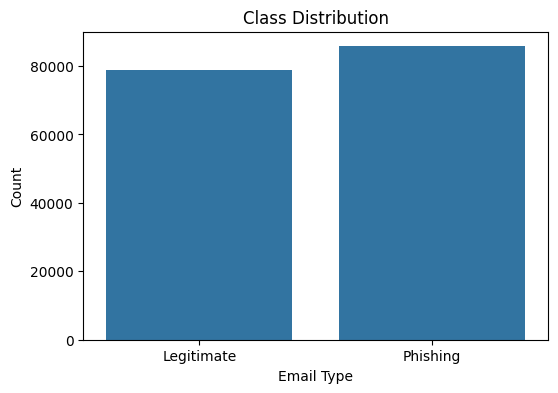

In [5]:
# Visualize the class distribution
print("Class distribution:")
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df)
plt.title('Class Distribution')
plt.xticks([0,1], ['Legitimate', 'Phishing'])
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.show()

## 2. Data Preprocessing

### 2.1 Text Preprocessing
- Lowercasing all text
- Removing punctuation and special characters
- Removing stop words

In [ ]:
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS  

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # Remove URLs
    # text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Remove stop words
    text = ' '.join([word for word in text.split() if word not in ENGLISH_STOP_WORDS])
    
    return text

df['text'] = df['text'].apply(preprocess_text)
print("Text preprocessing completed.")

Generating word clouds for phishing and legitimate emails...


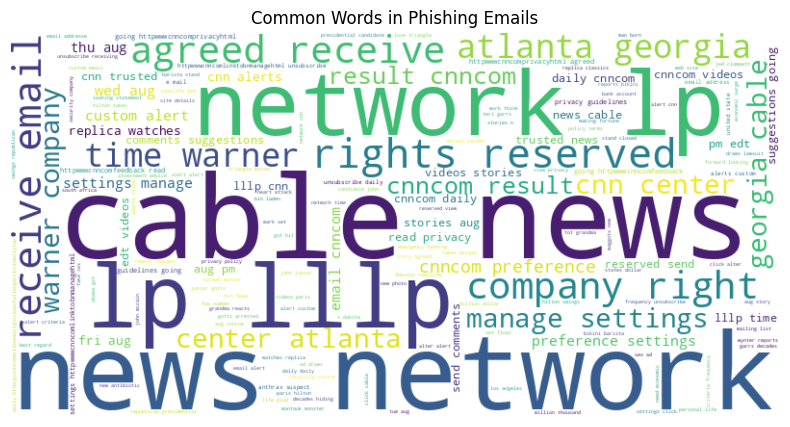

In [9]:
from wordcloud import WordCloud, STOPWORDS

print("Generating word clouds for phishing and legitimate emails...")

# For phishing emails
phishing_text = ' '.join(df[df['label']==1]['text'])

wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(phishing_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Phishing Emails')
plt.show()

### 2.2 Text Vectorization & Train-Test Split

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
# Fit and transform the text data
X = vectorizer.fit_transform(df['text']).toarray()
# Extract labels
y = df['label'].values
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# print(f"Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}")

## References:
- Al-Subaiey, A., Al-Thani, M., Alam, N. A., Antora, K. F., Khandakar, A., & Zaman, S. A. U. (2024, May 19). Novel Interpretable and Robust Web-based AI Platform for Phishing Email Detection. ArXiv.org. https://arxiv.org/abs/2405.11619*